<a href="https://colab.research.google.com/github/YasmineSarraj/M3-Assignment-Deep-Learning/blob/main/Penguins_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🐧  Applied Deep Learning

**Topic:** Applied Deep Learning for Classification on the penguin dataset

In this part we are preprocessing the data to feed it to the model. 

## Import dependencies

In [ ]:
# loading essential libraries

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import torch
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.metrics import accuracy_score, mean_squared_error
from statistics import mean

## Load dataset

In [ ]:
penguins = pd.read_csv("https://github.com/allisonhorst/palmerpenguins/raw/5b5891f01b52ae26ad8cb9755ec93672f49328a8/data/penguins_size.csv")
penguins.head()

,species_short,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


##  Preprocessing
We drop all missing values and divide it between categorical and numerical data to encode and scale the data. 

### Drop NaN values

In [ ]:
penguins.dropna(inplace=True)

In [ ]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species_short      334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


## Scale data

In [ ]:
#Here we scale the numerical variable
attributes = penguins.iloc[:,2:6]
scaler = StandardScaler()
num = scaler.fit_transform(attributes)
data_n = pd.DataFrame(num, columns=['culmen_length_mm','culmen_depth_mm','flipper_length_mm','body_mass_g'])

In [ ]:
data_n.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,-0.897653,0.783487,-1.429521,-0.571229
1,-0.824290,0.121896,-1.072408,-0.509011
2,-0.677564,0.427246,-0.429605,-1.193405
3,-1.337831,1.088836,-0.572450,-0.944535
4,-0.860972,1.750427,-0.786718,-0.695664


## Encoding data 

In [ ]:
#We encode a categorical variable. 
species = penguins.iloc[:, 0]
labelencoder = LabelEncoder()
cat = labelencoder.fit_transform(species)
enc_species = pd.DataFrame(cat, columns=['species_short'])

In [ ]:
enc_species.head()

,species_short
0,0
1,0
2,0
3,0
4,0


## Define X and y

In [ ]:
#Tensor Of all the numerical values, lenghth etc. 
X_tensor = torch.tensor(data_n.astype(np.float32).values)

#Tensor of the encoded categorical variable
y_tensor = torch.tensor(enc_species.astype(np.float32).values)

In [ ]:
#Check the type
print(X_tensor.dtype)
print(y_tensor.dtype)

#Check the shape
print(X_tensor.shape)
print(y_tensor.shape)

torch.float32
torch.float32
torch.Size([334, 4])
torch.Size([334, 1])


## Define neural network and train it

In [ ]:

# Initializing Hyperparameters
epochs = 100
learning_rate = 0.01
loss_set = {}

# 1. Creating a FeedForwardNetwork
model_net4 = torch.nn.Sequential(
                          # Input layer
                          torch.nn.Linear(4,8),
                          torch.nn.ReLU(),
                          # 1. Hidden layer
                          torch.nn.Linear(8,16),
                          torch.nn.ReLU(),
                          # Output layer
                          torch.nn.Linear(16,1),
                          torch.nn.Softmax()  # We have a multiclass single-label classification problem, since a penguin can only be from one species
                         );
loss_cel = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(model_net4.parameters(), lr=learning_rate)

# Loop over the number of epochs
for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(X_tensor, y_tensor):
          output = model_net4.forward(x.float())
          # 2. FeedForward Evaluation
          loss = loss_cel(output, y_t.float())
          optimizer.zero_grad();

          # 3. Backward / Gradient Calculation
          loss.backward()
          # 4. Back Propagation
          optimizer.step()
          # Store the loss for each sample of data
          lost_set_epoch[j] = loss
          j = j + 1
      
      # Store the loss for each epoch
      loss_set[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()

      # Display the loss after every 10 epochs
      if (i % 10)==0:
         print (f"Loss: {loss_set[i]}")


<ipython-input-55-808d32f4d463>:22: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):


  0%|          | 0/100 [00:00<?, ?epoch/s]

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/container.py:204: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Loss: 0.0
Loss: 0.0
Loss: 0.0
Loss: 0.0
Loss: 0.0
Loss: 0.0
Loss: 0.0
Loss: 0.0
Loss: 0.0
Loss: 0.0


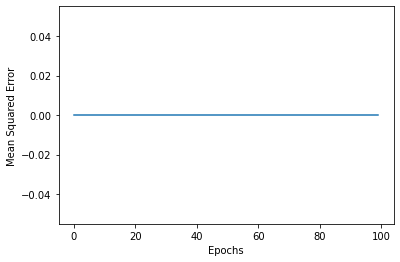

In [ ]:
plt.plot(np.array(list(loss_set.values())).astype(float))
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

## Accuracy

In [ ]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0


    labels = y_tensor
    outputs = model_net4(X_tensor.float())
    # max returns (value, index)
    _, predicted = torch.max(outputs.data, 1)
    n_samples += labels.size(0)
    n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f"Accuracy of the network on the 1000 test images: {acc} %")

RuntimeError: ignored

## Training ANN through Penguin classification dataset with 4 inputs and 2 hidden layers



In [ ]:
from tqdm import tqdm_notebook
from sklearn.metrics import accuracy_score, mean_squared_error
from statistics import mean

# 1. Creating a FeedForwardNetwork
model_net5 = torch.nn.Sequential(
                         torch.nn.Linear(4,6),
                         torch.nn.ReLU(),
                         torch.nn.Linear(6,5),
                         torch.nn.ReLU(),
                         torch.nn.Linear(5,1),
                         torch.nn.Sigmoid()
                         );
optimizer = torch.optim.RMSprop(model_net5.parameters(), lr=learning_rate)
loss_mse = torch.nn.MSELoss()
epochs = 50
learning_rate = 0.01
loss_set = {}



for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      lost_set_epoch = {}
      j = 0
      for x, y_t in zip(data_x_4, data_y_4):
          output = model_net5.forward(x.float())
          # 2. FeedForward Evaluation
          loss = loss_mse(output, y_t.float())
          optimizer.zero_grad()

          # 3. Backward / Gradient Calculation
          loss.backward()
          # 4. Back Propagation
          optimizer.step()
          #display_loss:
          lost_set_epoch[j] = loss
          j = j + 1
      
      loss_set[i] = torch.mean(torch.stack(list(lost_set_epoch.values()))).detach().numpy()
      if (i % 10)==0:
         print (f"Loss: {loss_set[i]}")
